In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import math


Un objet lointain émet une raie de longueur 656,3 nm
Nous observons cette raie décalée : quel est son redshift?
Pour cela nous devons déterminer la position de la raie observée sur le signal reçu

## Fonctions annexes :

### Calcule la longueur d'onde observée

In [2]:
def long_obs(z,l0):
    """
    Fontion qui calcule la longueur d'onde observée

    Args:
        z (float): redshift.
        l0 (float): longueur d'onde dans le réferentiel du laboratoire.

    Returns:
        float: longueur d'onde observée.
    """ 
    lob = z*l0 + l0
    return lob

### Calcule le redshift à partir de la longueur d'onde observée

In [3]:
def redshift(lobs, l0):
    """
    Calcule le redshift.

    Args:
        lobs (float): longueur d'onde observée
        l0 (float): longueur d'onde dans le réferentiel du laboratoire

    Returns:
        float: redshift
    """    
    redshift = abs(lobs - l0)/l0
    return redshift

### Créer n valeurs sur une plage de ini à fin

In [4]:
def longueurs(ini,fin,n):
    """
    Crée un array de n valeurs.

    Args:
        ini (float): Valeur initiale
        fin (float): Valeur finale
        n (int): quantité de valeurs

    Returns:
        l : array : array de n valeurs qui va de ini à fin
        step : float : pas qu'on donne
    """
    lond = np.linspace(ini, fin, n, retstep = True)
    l = lond[0]
    step = lond[1]
    return l,step

### Calcule la fonction de densité de probabilité sur une plage longueur d'un signal centré sur centre et de déviation dev 

In [5]:
def pdf(longueur, centre, dev):
    """
    Calcule la fonction de densité de probabilité sur une plage de données.

    Args:
        longueur (array): données
        centre (int): centre de la distribution
        dev (int): deviation standard

    Returns:
        array : densité de probabilité
    """
    y = stats.norm.pdf(longueur,centre, dev)
    return y

### Corrélations croisées entre des vraies données et un signal modèle

In [6]:
def cross(filtre,data):
    """
    Corrélations croisées entre des vraies données (signal + bruit) et le filtre

    Args:
        filtre (array): filtre crée, en prennant en compte que la matrice de corrélation du bruit est l'identité
        data (array): signal + bruit

    Returns:
        array : produit scalaire entre le filtre et notre data morceau par morceau
    """
    sizemod = np.size(filtre)
    sizesig = np.size(data)
        
    prod = []
    
    for i in range(sizesig-sizemod):
        p = np.dot(filtre,data[i:(i+sizemod)])
        prod.append(p)
    return prod

## Fonction principale calculant le signal sur bruit

In [7]:
def traitement_signal_simple(lobs, amp_signal, dev_signal, amp_bruit):
    """
    Fonction principale calculant le signal sur bruit
    Args:
        lobs (float): longueur d'onde observée
        amp_signal (float): amplitude du signal
        dev_signal (float): écart-type du signal
        amp_bruit (_type_): amplitude du bruit
    """
        
    """ Création du signal """
    
    l,step = longueurs(600,1400,1000)
    
    
    dev = dev_signal*0.01*lobs
    
    """ DONNEES """
    
    ysig = amp_signal*pdf(l,lobs,dev)
    
    plt.plot(l,ysig)
    plt.title("Signal seul")
    plt.xlabel("Longueur d'onde en nm")
    plt.ylabel("Pdf du signal")
    plt.show()
    
    
    bruit = amp_bruit*np.random.normal(0,1,1000)
    plt.plot(l,bruit)
    plt.title("Bruit blanc gaussien")
    plt.xlabel("Longueur d'onde en nm")
    plt.ylabel("Déviation standard")
    plt.show()
    
    data = ysig + bruit
    
    plt.plot(l,data)
    plt.title("Signal + bruit")
    plt.xlabel("Longueur d'onde en nm")
    plt.ylabel("Déviation standard")
    plt.show()
    
    
    """ MODELS: Du signal et du bruit """
    
    long_mod,step = longueurs(0,60*step,60)
    filtre = pdf(long_mod,(step*60/2),8)
    
    bruitmod = amp_bruit*np.random.normal(0,1,1000)
    
    """ TRAITEMENT DU SIGNAL """
    
    # Corrélations croisées modèle/données
    prodat = cross(filtre,data)
    
    # Corrélations croisées modèle/bruit
    prodbruit = cross(filtre,bruitmod)
    
    
    devbr = np.std(prodbruit)
    SNR = prodat/devbr
    
    plt.plot(SNR)
    plt.title("Signal sur bruit")
    plt.show()
    return SNR
 

## Fonction traitement le signal-sur-bruit:
### Détecte un signal seulement au-dessus de 3 sigma

In [8]:
def traitement_SNR(lobs, SNR):
    """
    Choisi les données avec une sensibilité SNR > 3

    Args:
        lobs (float): longueur d'onde observée
        SNR (array): signal sur bruit

    """
    SNR = SNR[SNR>3]
    
    # Si SNR < 3 warning : pas de signal détecté
    if not np.any(SNR):
        print("Pas de signal détecté")
        return None
        
    index = np.argmax(SNR[SNR>3]) 
    index+= 30
    
    l,step = longueurs(600,1400,1000)
    l_found = l[index]
    print("la longueur d'onde trouvée:", l_found)
    z = redshift(lobs, l_found)
    print("Le redshift trouvé:" ,z) 

## Données initiales:

In [9]:
l0 = 656.3
z = np.random.uniform(0.0,1.0)
lobs = long_obs(z,l0)
print("La longueur d'onde émise est :", l0, "nm")
print("Pour z = ", z, "la longueur d'onde observee sera", lobs,"nm")
print("On cherche à retrouver le redshift à partir d'un signal de la longueur d'onde observée")


La longueur d'onde émise est : 656.3 nm
Pour z =  0.5096995729394056 la longueur d'onde observee sera 990.8158297201319 nm
On cherche à retrouver le redshift à partir d'un signal de la longueur d'onde observée


## Traitement d'un signal simple pour 4 cas:

## Cas initial:

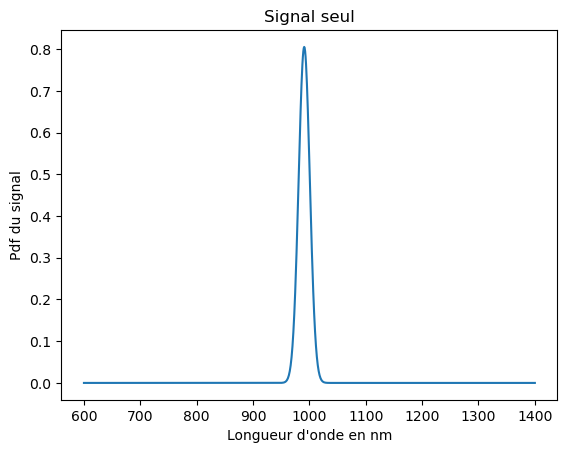

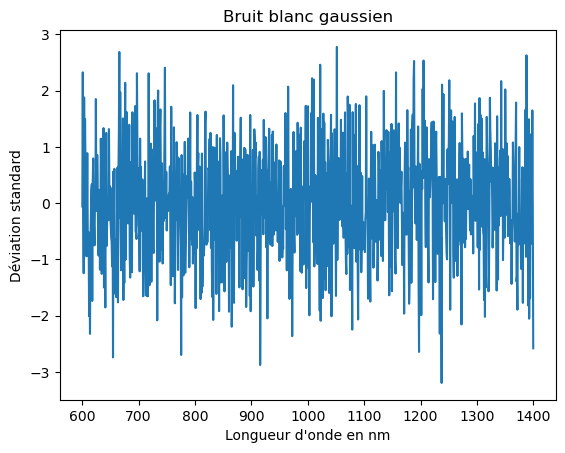

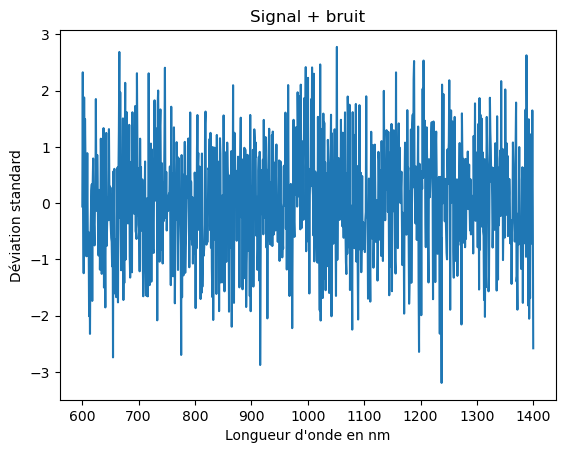

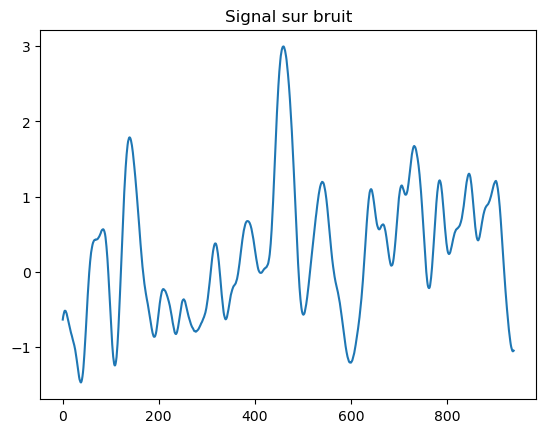

Pas de signal détecté
Le vrai redshift était  0.5096995729394056  et la longueur d'onde trouvé devrait être 656.3 nm


In [10]:
SNR = traitement_signal_simple(lobs, 20, 1, 1)
traitement_SNR(lobs, SNR)
print("Le vrai redshift était ", z, " et la longueur d'onde trouvé devrait être", l0,"nm")

## Cas où l'on augmente l'amplitude du signal:

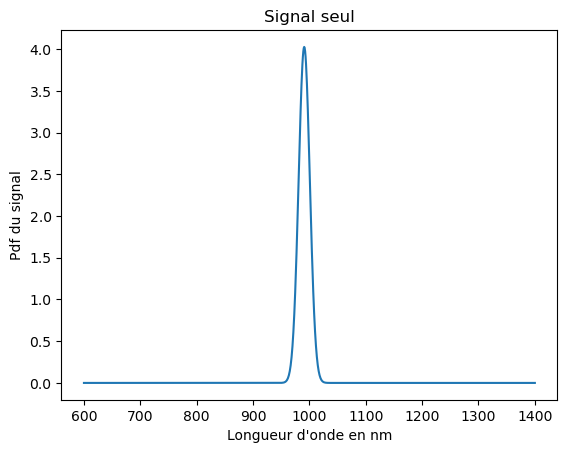

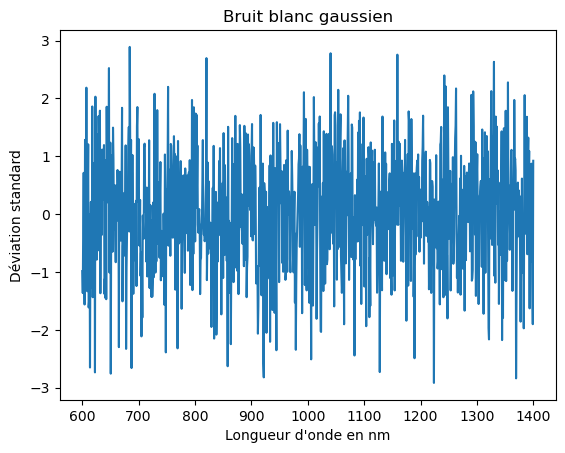

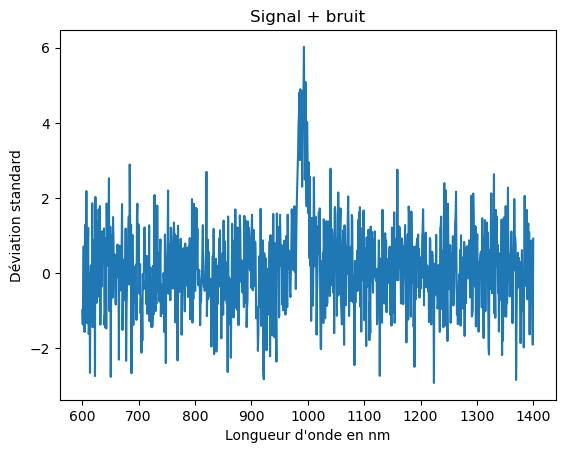

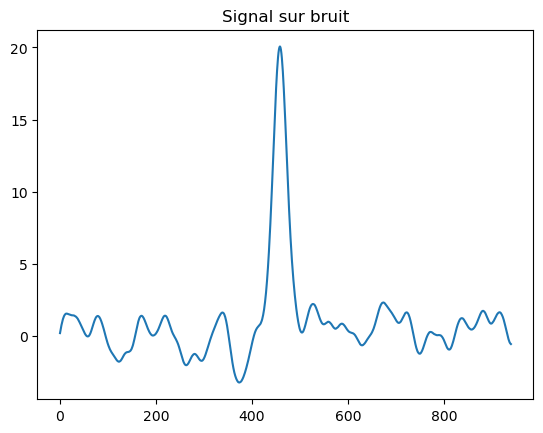

la longueur d'onde trouvée: 647.2472472472473
Le redshift trouvé: 0.5308150539598078
Le vrai redshift était  0.5096995729394056  et la longueur d'onde trouvé devrait être 656.3 nm


In [11]:
SNR = traitement_signal_simple(lobs, 100, 1, 1)
traitement_SNR(lobs, SNR)
print("Le vrai redshift était ", z, " et la longueur d'onde trouvé devrait être", l0,"nm")

## Cas où l'on diminue l'écart-type du signal:

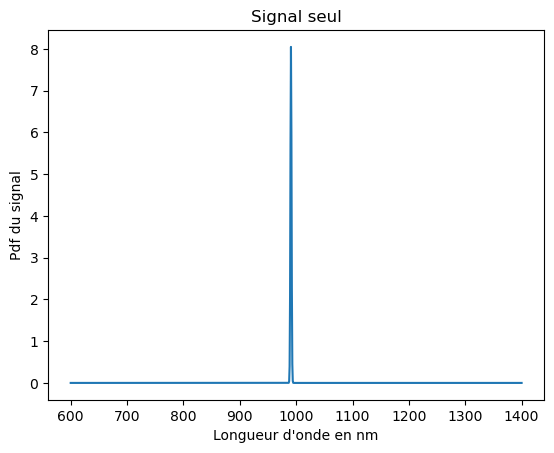

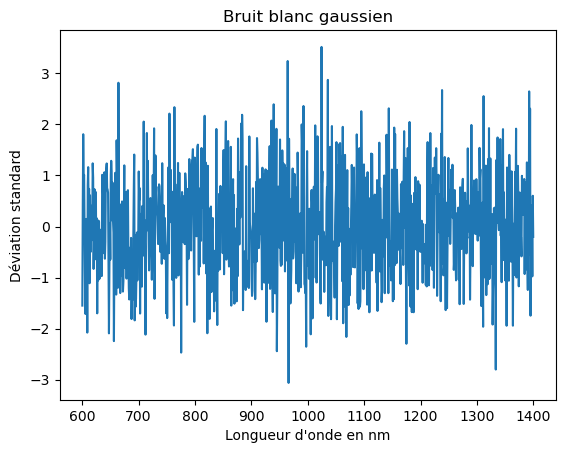

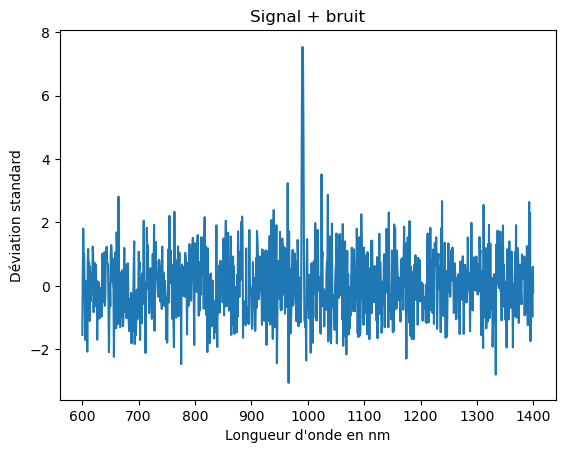

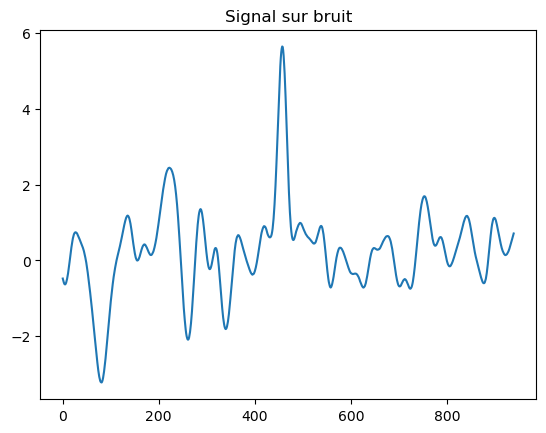

la longueur d'onde trouvée: 632.032032032032
Le redshift trouvé: 0.5676671110079375
Le vrai redshift était  0.5096995729394056  et la longueur d'onde trouvé devrait être 656.3 nm


In [12]:
SNR = traitement_signal_simple(lobs, 20, 0.1, 1)
traitement_SNR(lobs, SNR)
print("Le vrai redshift était ", z, " et la longueur d'onde trouvé devrait être", l0,"nm")

## Cas où l'on augmente le bruit:

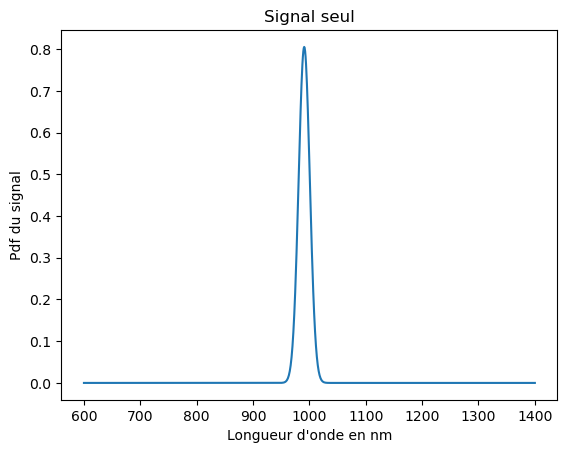

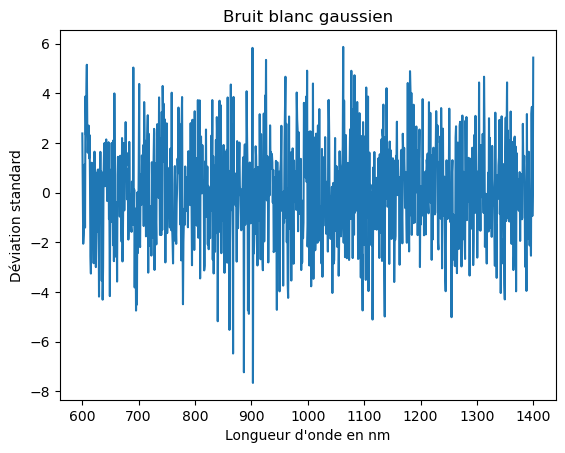

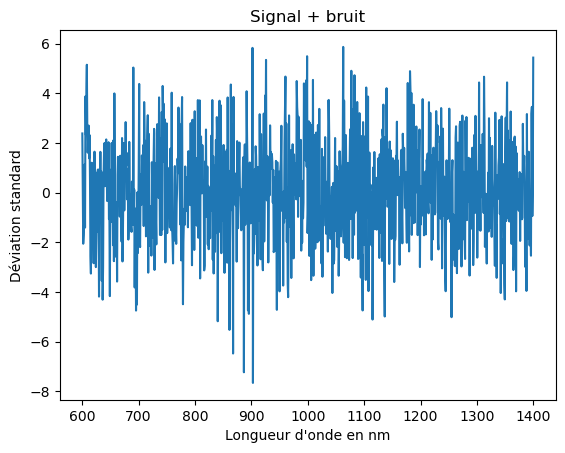

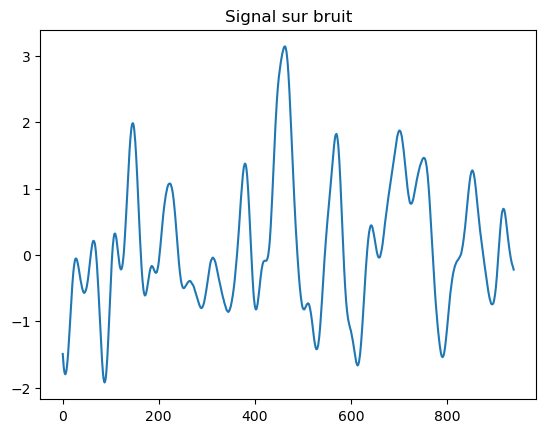

la longueur d'onde trouvée: 628.0280280280281
Le redshift trouvé: 0.5776618009091675
Le vrai redshift était  0.5096995729394056  et la longueur d'onde trouvé devrait être 656.3 nm


In [13]:
SNR = traitement_signal_simple(lobs, 20, 1, 2)
traitement_SNR(lobs, SNR)
print("Le vrai redshift était ", z, " et la longueur d'onde trouvé devrait être", l0,"nm")

## En conclusion:
La détection est meilleure pour un bruit faible, une amplitude du signal haute, et une déviation standard du signal faible")
